['Series ID', 'Series Name', 'Units', 'Region Name', 'Region Code', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11

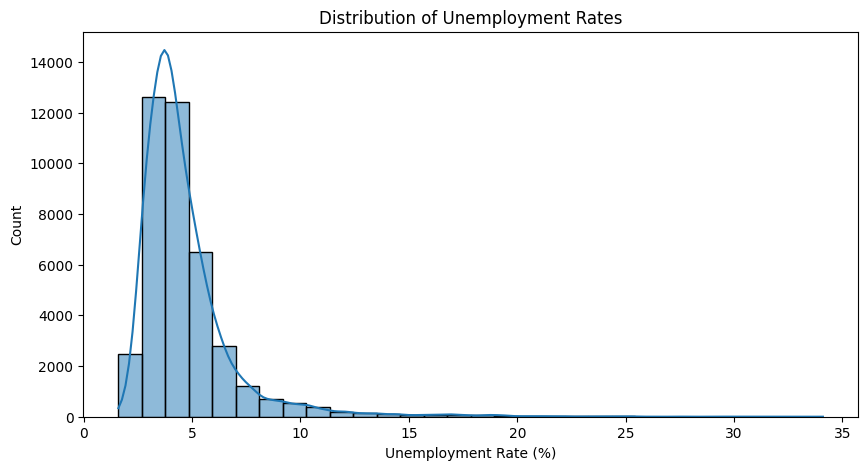

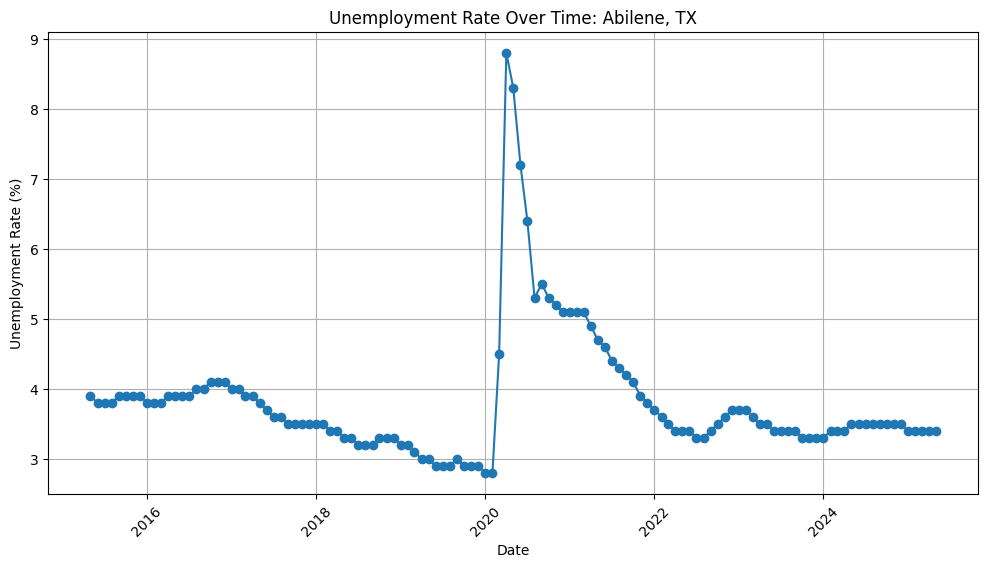

Region Name
Greenville-Anderson-Mauldin, SC      242
Abilene, TX                          121
Ogden-Clearfield, UT                 121
Palm Bay-Melbourne-Titusville, FL    121
Oxnard-Thousand Oaks-Ventura, CA     121
Owensboro, KY                        121
Oshkosh-Neenah, WI                   121
Orlando-Kissimmee-Sanford, FL        121
Omaha-Council Bluffs, NE-IA          121
Olympia-Tumwater, WA                 121
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📍 Load dataset
data_path = "../data/unemployment_rates.csv"
df = pd.read_csv(data_path)

# 📃 Check column names
print(df.columns.tolist())

# 📊 Melt the wide table into long format
value_vars = df.columns[5:]  # from 5th column onwards (the date columns)
df_long = pd.melt(df, 
                  id_vars=['Region Name'], 
                  value_vars=value_vars, 
                  var_name='Date', 
                  value_name='Unemployment Rate')

# ✅ Check transformed data
print(df_long.head())
print(df_long.info())

# 📅 Convert Date to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])

# 🔍 Number of unique MSAs
print("Number of unique MSAs:", df_long['Region Name'].nunique())

# 📈 Date range
print(f"Date range: {df_long['Date'].min()} to {df_long['Date'].max()}")

# 📉 Missing values
print(df_long.isnull().sum())

# 📊 Distribution of Unemployment Rates
plt.figure(figsize=(10,5))
sns.histplot(df_long['Unemployment Rate'], bins=30, kde=True)
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Count")
plt.show()

# 📉 Example time series for a single MSA
example_msa = df_long['Region Name'].unique()[0]
msa_df = df_long[df_long['Region Name'] == example_msa].sort_values('Date')

plt.figure(figsize=(12,6))
plt.plot(msa_df['Date'], msa_df['Unemployment Rate'], marker='o')
plt.title(f"Unemployment Rate Over Time: {example_msa}")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 📊 Records per MSA
msa_counts = df_long['Region Name'].value_counts()
print(msa_counts.head(10))

